## The GitHub History of the Scala Language





## Project Description

Open source projects contain entire development histories, such as who made changes, the changes themselves, and code reviews. In this project, you'll be challenged to read in, clean up, and visualize the real-world project repository of Scala that spans data from a version control system (Git) as well as a project hosting site (GitHub). With almost 30,000 commits and a history spanning over ten years, Scala is a mature language. You will find out who has had the most influence on its development and who are the experts.

The dataset includes the project history of Scala retrieved from Git and GitHub as a set of CSV files.


## Project Tasks

    1. Scala's real-world project repository data
    2. Preparing and cleaning the data
    3. Merging the DataFrames
    4. Is the project still actively maintained?
    5. Is there camaraderie in the project?
    6. What files were changed in the last ten pull requests?
    7. Who made the most pull requests to a given file?
    8. Who made the last ten pull requests on a given file?
    9. The pull requests of two special developers
    10. Visualizing the contributions of each developer
    

## 1. Scala's real-world project repository data

With almost 30k commits and a history spanning over ten years, Scala is a mature programming language. It is a general-purpose programming language that has recently become another prominent language for data scientists.

Scala is also an open source project. Open source projects have the advantage that their entire development histories -- who made changes, what was changed, code reviews, etc. -- are publicly available.

We're going to read in, clean up, and visualize the real world project repository of Scala that spans data from a version control system (Git) as well as a project hosting site (GitHub). We will find out who has had the most influence on its development and who are the experts.

The dataset we will use, which has been previously mined and extracted from GitHub, is comprised of three files:

    'pulls_2011-2013.csv' contains the basic information about the pull requests, and spans from the end of 2011 up to (but not including) 2014.
    'pulls_2014-2018.csv' contains identical information, and spans from 2014 up to 2018.
    'pull_files.csv' contains the files that were modified by each pull request.



In [2]:
import pandas as pd


pulls_11_13 = pd.read_csv('pulls_2011-2013.csv')
print(pulls_11_13.head())
print(pulls_11_13.shape)


pulls_14_18 = pd.read_csv('pulls_2014-2018.csv')
print(pulls_14_18.head())
print(pulls_14_18.shape)



pull_files = pd.read_csv('pull_files.csv')
print(pull_files.head())
print(pull_files.shape)


        pid         user                  date
0  11166973  VladimirNik  2013-12-31T23:10:55Z
1  11161892      Ichoran  2013-12-31T16:55:47Z
2  11153894      Ichoran  2013-12-31T02:41:13Z
3  11151917      rklaehn  2013-12-30T23:45:47Z
4  11131244        qerub  2013-12-29T17:21:01Z
(3296, 3)
         pid       user                  date
0  163314316     hrhino  2018-01-16T23:29:16Z
1  163061502   joroKr21  2018-01-15T23:44:52Z
2  163057333  mkeskells  2018-01-15T23:05:06Z
3  162985594      lrytz  2018-01-15T15:52:39Z
4  162838837  zuvizudar  2018-01-14T19:16:16Z
(2904, 3)
         pid                                   file
0  163314316        test/files/pos/t5638/Among.java
1  163314316       test/files/pos/t5638/Usage.scala
2  163314316             test/files/pos/t9291.scala
3  163314316             test/files/run/t8348.check
4  163314316  test/files/run/t8348/TableColumn.java
(85588, 2)


## 2. Preparing and cleaning the data

First, we will need to combine the data from the two separate pull DataFrames.

Next, the raw data extracted from GitHub contains dates in the ISO8601 format. However, pandas imports them as regular strings. To make our analysis easier, we need to convert the strings into Python's DateTime objects. DateTime objects have the important property that they can be compared and sorted.

The pull request times are all in UTC (also known as Coordinated Universal Time). The commit times, however, are in the local time of the author with time zone information (number of hours difference from UTC). To make comparisons easy, we should convert all times to UTC.


In [3]:
df = pd.concat([pulls_11_13, pulls_14_18], ignore_index=True, keys='pid', sort=True)
                                                            # df.merge() on=,  pd.concat() keys=
                                                            #########################################################
print(df.head())
print(df.shape)


df['date'] = pd.to_datetime(df['date'])
print(df.head())


from datetime import datetime

tzone = datetime.today() - datetime.utcnow()
print(tzone)



                   date       pid         user
0  2013-12-31T23:10:55Z  11166973  VladimirNik
1  2013-12-31T16:55:47Z  11161892      Ichoran
2  2013-12-31T02:41:13Z  11153894      Ichoran
3  2013-12-30T23:45:47Z  11151917      rklaehn
4  2013-12-29T17:21:01Z  11131244        qerub
(6200, 3)
                       date       pid         user
0 2013-12-31 23:10:55+00:00  11166973  VladimirNik
1 2013-12-31 16:55:47+00:00  11161892      Ichoran
2 2013-12-31 02:41:13+00:00  11153894      Ichoran
3 2013-12-30 23:45:47+00:00  11151917      rklaehn
4 2013-12-29 17:21:01+00:00  11131244        qerub
-1 day, 18:59:59.999993


In [ ]:
# Append pulls_one to pulls_two
pulls = pulls_one.append(pulls_two)
#                 df.append() method can do a outer join, set 'reduice_index=', 'sort='


# Convert the date for the pulls object
pulls['date'] = pd.to_datetime(pulls['date'],utc = True)


## 3. Merging the DataFrames

The data extracted comes in two separate files. Merging the two DataFrames will make it easier for us to analyze the data in the future tasks.


In [4]:
f_df = df.merge(pull_files, on='pid').sort_values('date')

print(f_df[1060:1090])

                           date     pid     user  \
50341 2012-01-28 08:00:37+00:00  749717  xeno-by   
50340 2012-01-28 08:00:37+00:00  749717  xeno-by   
50339 2012-01-29 15:00:00+00:00  751615  xeno-by   
50338 2012-01-29 15:00:00+00:00  751615  xeno-by   
50330 2012-01-30 12:58:35+00:00  754076   axel22   
50332 2012-01-30 12:58:35+00:00  754076   axel22   
50331 2012-01-30 12:58:35+00:00  754076   axel22   
50334 2012-01-30 12:58:35+00:00  754076   axel22   
50337 2012-01-30 12:58:35+00:00  754076   axel22   
50335 2012-01-30 12:58:35+00:00  754076   axel22   
50336 2012-01-30 12:58:35+00:00  754076   axel22   
50333 2012-01-30 12:58:35+00:00  754076   axel22   
50329 2012-01-30 13:01:49+00:00  754084   axel22   
50328 2012-01-30 15:10:06+00:00  754713  hubertp   
50327 2012-01-30 15:10:06+00:00  754713  hubertp   
50323 2012-01-31 11:01:39+00:00  759725  xeno-by   
50325 2012-01-31 11:01:39+00:00  759725  xeno-by   
50326 2012-01-31 11:01:39+00:00  759725  xeno-by   
50324 2012-0

## 4. Is the project still actively maintained?

The activity in an open source project is not very consistent. Some projects might be active for many years after the initial release, while others can slowly taper out into oblivion. Before committing to contributing to a project, it is important to understand the state of the project. Is development going steadily, or is there a drop? Has the project been abandoned altogether?

# The data used in this project was collected in January of 2018. We are interested in the evolution of the number of contributions up to that date.

# For Scala, we will do this by plotting a chart of the project's activity. We will calculate the number of pull requests submitted each (calendar) month during the project's lifetime. We will then plot these numbers to see the trend of contributions.

    A helpful reminder of how to access various components of a date can be found in this exercise of Data Manipulation with pandas

    Additionally, recall that you can group by multiple variables by passing a list to groupby(). This video from Data Manipulation with pandas should help!


# *******************************************************************************************************************

            pid
date2          
2011-12-01   22
2011-12-02   29
2011-12-03    2
2011-12-04   35
2011-12-05  119
...         ...
2018-01-12    4
2018-01-13    5
2018-01-14    1
2018-01-15    6
2018-01-16    7

[1872 rows x 1 columns]


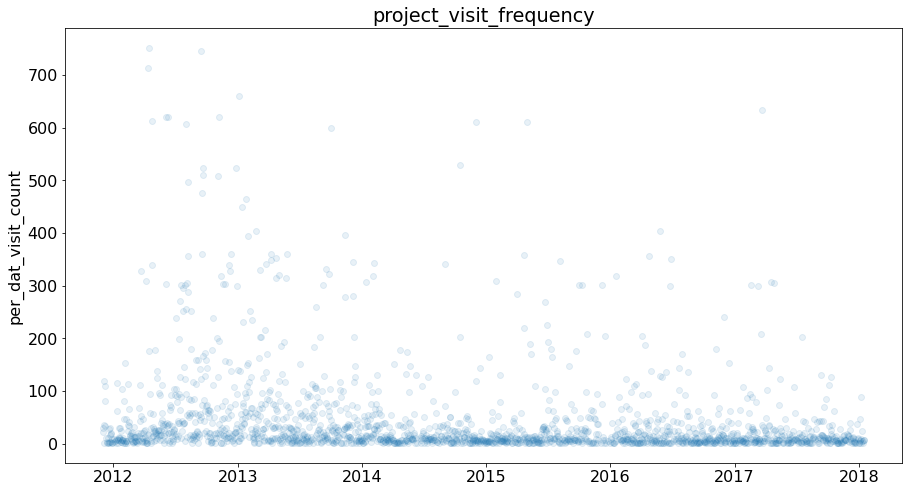

In [34]:
import matplotlib.pyplot as plt


f_df['date2'] = f_df['date'].dt.date
#print(f_df.head())





#f_df['ym_group'] = [i.year+i.month for i in f_df['date']]



#ff = [i[0:8] for i in f_df['str_date'][:100]]
#print(ff)

#f_df['date_group'] = pd.DataFrame()
#for i in f_df['date']:
#    f_df['date_group'].append(str(i.year)+' '+str(i.month))



count = f_df.groupby('date2').count()

#plt.scatter(x=day_group, y=f_df.groupby('ym_group').count())


#print(f_df.groupby('date')['pid'].value_counts())



#count.plot(kind='bar', figsize=(12, 8))



outcome = f_df.pivot_table(values='pid', index='date2', aggfunc=lambda x: x.count())
print(outcome)


plt.rcParams['font.size'] = '16'
fig = plt.figure(figsize=(15,8))

plt.scatter(x=outcome.index, y=outcome['pid'], alpha=0.1)


# avg_inv_by_month = inv_jul_thr_sep.groupby(level=0)['total'].mean()

plt.ylabel('per_dat_visit_count')
plt.title('project_visit_frequency')   # pid count by date

plt.show()


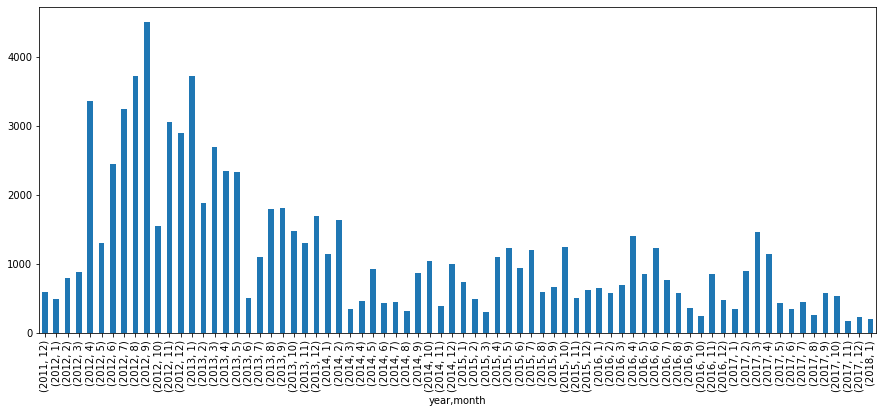

In [37]:
%matplotlib inline


# Create a column that will store the month
f_df['month'] = f_df['date'].dt.month
# ***************************************************************************************************************** #

# Create a column that will store the year
f_df['year'] = f_df['date'].dt.year



# Group by the month and year and count the pull requests
counts = f_df.groupby(['year', 'month'])['pid'].count()
# ***************************************************************************************************************** #
# ***************************************************************************************************************** #


# Plot the results
counts.plot(kind='bar', figsize = (15,6))
plt.show()

In [45]:
print(dir(pd.Series))

['T', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex